In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프를 그리기 위한 기본 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터를 불러온다.
df1 = pd.read_csv('data/naver_baseball_TT.csv')
df1

,경기일자,팀1이름,팀1점수,팀2이름,팀2점수
0,2008-03-29,KIA,3,삼성,4
1,2008-03-29,LG,4,SK,5
2,2008-03-29,롯데,11,한화,1
3,2008-03-30,롯데,9,한화,8
4,2008-03-30,KIA,0,삼성,3
...,...,...,...,...,...
11863,2025-05-15,KT,0,삼성,13
11864,2025-05-15,롯데,6,KIA,7
11865,2025-05-15,NC,0,SSG,4
11866,2025-05-15,두산,8,한화,2


In [3]:
# 팀1이 팀2와의 경기에서 어떻게 되었는가 뿐만 아니라 팀2가 팀1와의 경기에서 어떻게 되었는지도 살펴봐야 한다.
# 따라서 편하게 하기 위해 데이터 프레임을 복제한 새로운 데이터 프레임을 만든다음
# 새로 만든 데이터 프레임의 컬럼 이름을 팀1은 팀2로 팀2는 팀1로 바꾼다음 두 데이터 프레임을 합친다.
# 그 후 팀1이 팀와의 경기에서 어떻게 되었는가만 분석을 한다.

# 데이터 프레임을 복제한다.
df2 = df1.copy()
# 컬럼 이름을 변경한다.
df2.columns = ['경기일자', '팀2이름', '팀2점수', '팀1이름', '팀1점수']
df2

,경기일자,팀2이름,팀2점수,팀1이름,팀1점수
0,2008-03-29,KIA,3,삼성,4
1,2008-03-29,LG,4,SK,5
2,2008-03-29,롯데,11,한화,1
3,2008-03-30,롯데,9,한화,8
4,2008-03-30,KIA,0,삼성,3
...,...,...,...,...,...
11863,2025-05-15,KT,0,삼성,13
11864,2025-05-15,롯데,6,KIA,7
11865,2025-05-15,NC,0,SSG,4
11866,2025-05-15,두산,8,한화,2


In [4]:
# 두 데이터 프레임을 병합한다.
df3 = pd.concat([df1, df2])
df3.reset_index(inplace=True, drop=True)
df3

,경기일자,팀1이름,팀1점수,팀2이름,팀2점수
0,2008-03-29,KIA,3,삼성,4
1,2008-03-29,LG,4,SK,5
2,2008-03-29,롯데,11,한화,1
3,2008-03-30,롯데,9,한화,8
4,2008-03-30,KIA,0,삼성,3
...,...,...,...,...,...
23731,2025-05-15,삼성,13,KT,0
23732,2025-05-15,KIA,7,롯데,6
23733,2025-05-15,SSG,4,NC,0
23734,2025-05-15,한화,2,두산,8


In [5]:
# 데이터 프레임의 정보를 확인한다.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23736 entries, 0 to 23735
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   경기일자    23736 non-null  object
 1   팀1이름    23736 non-null  object
 2   팀1점수    23736 non-null  int64 
 3   팀2이름    23736 non-null  object
 4   팀2점수    23736 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 927.3+ KB


In [6]:
# 결측치 확인
df3.isna().sum()

경기일자    0
팀1이름    0
팀1점수    0
팀2이름    0
팀2점수    0
dtype: int64

In [7]:
# 점수별 이상치가 있는지 확인해본다.
# 야구점수는 최대는 없지면 최소를 0으로 한다.
df3[['팀1점수', '팀2점수']].agg(['min', 'max'])

,팀1점수,팀2점수
min,0,0
max,30,30


In [8]:
# 팀 이름에 이상치가 있는지 확인해본다.
display(df3['팀1이름'].value_counts().index)
display(df3['팀2이름'].value_counts().index)

Index(['두산', '삼성', 'LG', '롯데', 'KIA', '한화', 'NC', '키움', 'SK', 'KT', 'SSG',
       '넥센', 'kt', '나눔', '드림', '한국', '캔버라', '퉁이', '라쿠텐', '요미우리', '이스턴', '라미고',
       '웨스턴', 'EDA', '볼로냐', '차이나', '대만', '퍼스', '태국', '중국', '홍콩'],
      dtype='object', name='팀1이름')

Index(['두산', '삼성', 'LG', '롯데', 'KIA', '한화', 'NC', '키움', 'SK', 'KT', 'SSG',
       '넥센', 'kt', '드림', '나눔', '한국', '퉁이', '캔버라', '라쿠텐', '요미우리', '웨스턴', '라미고',
       '이스턴', 'EDA', '볼로냐', '퍼스', '대만', '차이나', '홍콩', '태국', '중국'],
      dtype='object', name='팀2이름')

### 이상치 처리
- KBO 정규시즌의 팀들만 가지고 한다.
- 정규시즌 팀이 아는 것은 모두 제거한다.
- kt 를 KT로 변경
- 넥슨을 키움으로 변경
- SK를 SSG로 변경

In [9]:
# 팀 이름에 kt라고 되어 있는 것을 KT로 변경한다.
kt1 = df3.query('팀1이름 == "kt"').index
df3.loc[kt1, '팀1이름'] = 'KT'

kt2 = df3.query('팀2이름 == "kt"').index
df3.loc[kt2, '팀2이름'] = 'KT'

display(df3['팀1이름'].value_counts().index)
display(df3['팀2이름'].value_counts().index)

Index(['두산', '삼성', 'LG', '롯데', 'KIA', '한화', 'NC', '키움', 'KT', 'SK', 'SSG',
       '넥센', '나눔', '드림', '한국', '캔버라', '퉁이', '라쿠텐', '요미우리', '이스턴', '라미고', '웨스턴',
       '볼로냐', 'EDA', '차이나', '퍼스', '대만', '태국', '중국', '홍콩'],
      dtype='object', name='팀1이름')

Index(['두산', '삼성', 'LG', '롯데', 'KIA', '한화', 'NC', '키움', 'KT', 'SK', 'SSG',
       '넥센', '드림', '나눔', '한국', '퉁이', '캔버라', '라쿠텐', '요미우리', '웨스턴', '라미고', '이스턴',
       'EDA', '볼로냐', '퍼스', '차이나', '대만', '홍콩', '태국', '중국'],
      dtype='object', name='팀2이름')

In [10]:
# 팀 이름에 넥센이라고 되어 있는 것을 키움으로 변경한다.
kt1 = df3.query('팀1이름 == "넥센"').index
df3.loc[kt1, '팀1이름'] = '키움'

kt2 = df3.query('팀2이름 == "넥센"').index
df3.loc[kt2, '팀2이름'] = '키움'

display(df3['팀1이름'].value_counts().index)
display(df3['팀2이름'].value_counts().index)

Index(['두산', '키움', '삼성', 'LG', '롯데', 'KIA', '한화', 'NC', 'KT', 'SK', 'SSG',
       '나눔', '드림', '한국', '캔버라', '퉁이', '라쿠텐', '요미우리', '이스턴', '라미고', '웨스턴',
       '볼로냐', 'EDA', '차이나', '퍼스', '대만', '태국', '중국', '홍콩'],
      dtype='object', name='팀1이름')

Index(['두산', '키움', '삼성', 'LG', '롯데', 'KIA', '한화', 'NC', 'KT', 'SK', 'SSG',
       '드림', '나눔', '한국', '퉁이', '캔버라', '라쿠텐', '요미우리', '웨스턴', '라미고', '이스턴',
       'EDA', '볼로냐', '퍼스', '차이나', '대만', '홍콩', '태국', '중국'],
      dtype='object', name='팀2이름')

In [11]:
# 팀 이름에 SK라고 되어 있는 것을 SSG로 변경한다.
kt1 = df3.query('팀1이름 == "SK"').index
df3.loc[kt1, '팀1이름'] = 'SSG'

kt2 = df3.query('팀2이름 == "SK"').index
df3.loc[kt2, '팀2이름'] = 'SSG'

display(df3['팀1이름'].value_counts().index)
display(df3['팀2이름'].value_counts().index)

Index(['두산', '키움', 'SSG', '삼성', 'LG', '롯데', 'KIA', '한화', 'NC', 'KT', '나눔',
       '드림', '한국', '캔버라', '퉁이', '요미우리', '이스턴', '라미고', '라쿠텐', '웨스턴', '대만',
       '차이나', 'EDA', '볼로냐', '퍼스', '태국', '중국', '홍콩'],
      dtype='object', name='팀1이름')

Index(['두산', '키움', 'SSG', '삼성', 'LG', '롯데', 'KIA', '한화', 'NC', 'KT', '드림',
       '나눔', '한국', '퉁이', '캔버라', '라쿠텐', '라미고', '웨스턴', '요미우리', '이스턴', 'EDA',
       '볼로냐', '퍼스', '차이나', '대만', '홍콩', '태국', '중국'],
      dtype='object', name='팀2이름')

In [12]:
# 정규시즌 팀이 아니면 제거한다.
team_list = ['두산', '키움', 'SSG', '삼성', 'LG', '롯데', 'KIA', '한화', 'NC', 'KT']

remove_team1 = df3.query('팀1이름 not in @team_list').index
df3.drop(remove_team1, inplace=True)

remove_team2 = df3.query('팀2이름 not in @team_list').index
df3.drop(remove_team2, inplace=True)

display(df3['팀1이름'].value_counts().index)
display(df3['팀2이름'].value_counts().index)

Index(['두산', '키움', 'SSG', '삼성', 'LG', '롯데', 'KIA', '한화', 'NC', 'KT'], dtype='object', name='팀1이름')

Index(['두산', '키움', 'SSG', '삼성', 'LG', '롯데', 'KIA', '한화', 'NC', 'KT'], dtype='object', name='팀2이름')

In [13]:
# index를 리셋한다.
df3.reset_index(inplace=True, drop=True)
df3

,경기일자,팀1이름,팀1점수,팀2이름,팀2점수
0,2008-03-29,KIA,3,삼성,4
1,2008-03-29,LG,4,SSG,5
2,2008-03-29,롯데,11,한화,1
3,2008-03-30,롯데,9,한화,8
4,2008-03-30,KIA,0,삼성,3
...,...,...,...,...,...
23663,2025-05-15,삼성,13,KT,0
23664,2025-05-15,KIA,7,롯데,6
23665,2025-05-15,SSG,4,NC,0
23666,2025-05-15,한화,2,두산,8


In [14]:
# 각 팀별 경기 횟수
df3['팀1이름'].value_counts()

팀1이름
두산     2587
키움     2553
SSG    2547
삼성     2538
LG     2532
롯데     2513
KIA    2496
한화     2488
NC     1850
KT     1564
Name: count, dtype: int64

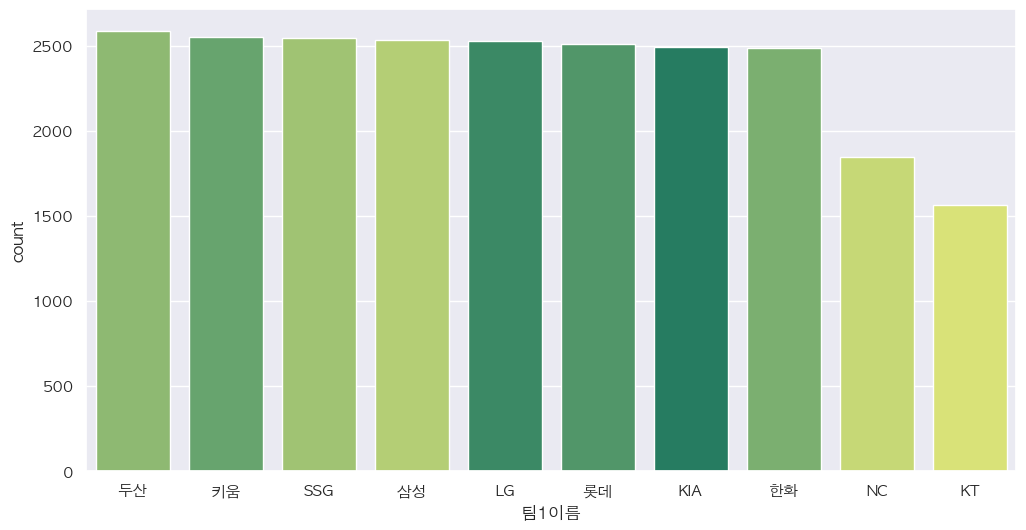

In [15]:
a1 = df3['팀1이름'].value_counts().index
# display(a1)

sns.countplot(data=df3, x='팀1이름', order=a1, hue='팀1이름', palette='summer')
plt.show()

In [16]:
# 각 팀별 승률을 구하기 위해 경기 결과 컬럼을 만든다.
df3['경기결과'] = '승리'
df3

,경기일자,팀1이름,팀1점수,팀2이름,팀2점수,경기결과
0,2008-03-29,KIA,3,삼성,4,승리
1,2008-03-29,LG,4,SSG,5,승리
2,2008-03-29,롯데,11,한화,1,승리
3,2008-03-30,롯데,9,한화,8,승리
4,2008-03-30,KIA,0,삼성,3,승리
...,...,...,...,...,...,...
23663,2025-05-15,삼성,13,KT,0,승리
23664,2025-05-15,KIA,7,롯데,6,승리
23665,2025-05-15,SSG,4,NC,0,승리
23666,2025-05-15,한화,2,두산,8,승리


In [17]:
# 팀1이 팀2에 진 경기는 패배라고 변경한다.
idx = df3.query('팀1점수 < 팀2점수').index
df3.loc[idx, '경기결과'] = '패배'
df3

,경기일자,팀1이름,팀1점수,팀2이름,팀2점수,경기결과
0,2008-03-29,KIA,3,삼성,4,패배
1,2008-03-29,LG,4,SSG,5,패배
2,2008-03-29,롯데,11,한화,1,승리
3,2008-03-30,롯데,9,한화,8,승리
4,2008-03-30,KIA,0,삼성,3,패배
...,...,...,...,...,...,...
23663,2025-05-15,삼성,13,KT,0,승리
23664,2025-05-15,KIA,7,롯데,6,승리
23665,2025-05-15,SSG,4,NC,0,승리
23666,2025-05-15,한화,2,두산,8,패배


In [18]:
# 비긴 경기는 무승부라고 한다.
idx = df3.query('팀1점수 == 팀2점수').index
df3.loc[idx, '경기결과'] = '무승부'
df3

,경기일자,팀1이름,팀1점수,팀2이름,팀2점수,경기결과
0,2008-03-29,KIA,3,삼성,4,패배
1,2008-03-29,LG,4,SSG,5,패배
2,2008-03-29,롯데,11,한화,1,승리
3,2008-03-30,롯데,9,한화,8,승리
4,2008-03-30,KIA,0,삼성,3,패배
...,...,...,...,...,...,...
23663,2025-05-15,삼성,13,KT,0,승리
23664,2025-05-15,KIA,7,롯데,6,승리
23665,2025-05-15,SSG,4,NC,0,승리
23666,2025-05-15,한화,2,두산,8,패배


In [19]:
df3['경기결과'].value_counts()

경기결과
패배     11515
승리     11515
무승부      638
Name: count, dtype: int64

In [20]:
# 각팀별 경기 횟수를 구한다.
df4 = df3[['팀1이름', '경기결과']]
play_count = df4.groupby('팀1이름').count()
play_count

,경기결과
팀1이름,
KIA,2496
KT,1564
LG,2532
NC,1850
SSG,2547
두산,2587
롯데,2513
삼성,2538
키움,2553


In [21]:
# 각 팀별로 승리한 횟수를 가져온다.
# 팀1이 팀2에 승리한 경기만 가져온다.
df4 = df3.query('경기결과 == "승리"')
df5 = df4[['팀1이름', '경기결과']]
win_count = df5.groupby('팀1이름').count()
win_count

,경기결과
팀1이름,
KIA,1223
KT,727
LG,1245
NC,912
SSG,1324
두산,1371
롯데,1193
삼성,1280
키움,1218


In [22]:
# 승률을 구한다.
team_win_rate = win_count / play_count * 100
team_win_rate = team_win_rate.astype('int')
team_win_rate.columns = ['승률']
team_win_rate.sort_values('승률', ascending=False, inplace=True)
team_win_rate

,승률
팀1이름,
두산,52
SSG,51
삼성,50
LG,49
NC,49
KIA,48
롯데,47
키움,47
KT,46


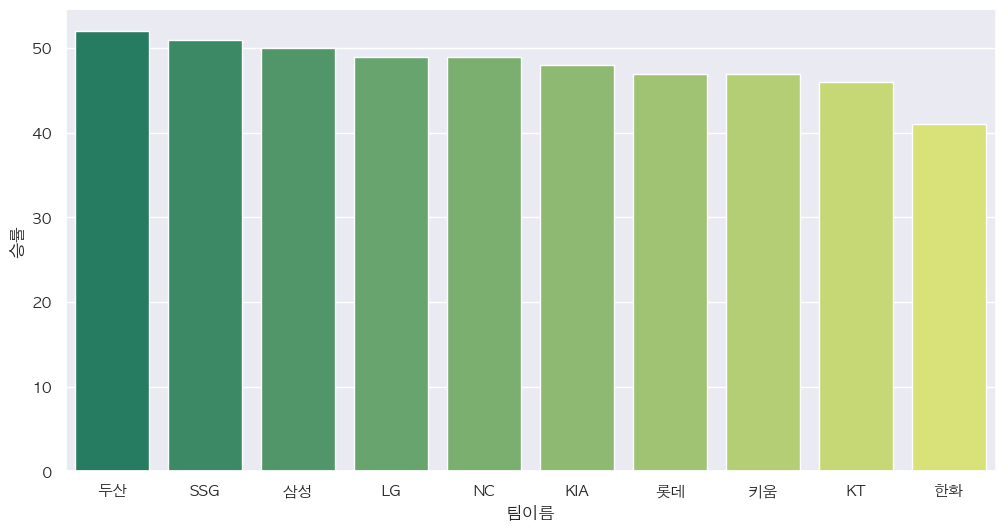

In [23]:
team_win_rate2 = team_win_rate.reset_index()
team_win_rate2.columns = ['팀이름', '승률']

sns.barplot(data=team_win_rate2, x='팀이름', y='승률', hue='팀이름', palette='summer')
plt.show()

In [24]:
# 각 팀별 년도별 승률
df3['경기년도'] = df3['경기일자'].str[:4]
df3

,경기일자,팀1이름,팀1점수,팀2이름,팀2점수,경기결과,경기년도
0,2008-03-29,KIA,3,삼성,4,패배,2008
1,2008-03-29,LG,4,SSG,5,패배,2008
2,2008-03-29,롯데,11,한화,1,승리,2008
3,2008-03-30,롯데,9,한화,8,승리,2008
4,2008-03-30,KIA,0,삼성,3,패배,2008
...,...,...,...,...,...,...,...
23663,2025-05-15,삼성,13,KT,0,승리,2025
23664,2025-05-15,KIA,7,롯데,6,승리,2025
23665,2025-05-15,SSG,4,NC,0,승리,2025
23666,2025-05-15,한화,2,두산,8,패배,2025


In [25]:
# 경기 결과가 승리인 것만 가져온다.
df4 = df3.query('경기결과 == "승리"')
# 필요한 컬럼만 가져온다.
df5 = df4[['팀1이름', '경기년도']]
# 팀의 이름을 중복을 제외하고 가져온다.
team_list = df5['팀1이름'].unique()

In [26]:
# 필요한 컬럼만 가져온다.
df4 = df3[['팀1이름', '경기결과', '경기년도']]
# 팀이름을 중복되지 않게 가져온다.
team_list = df4['팀1이름'].unique()

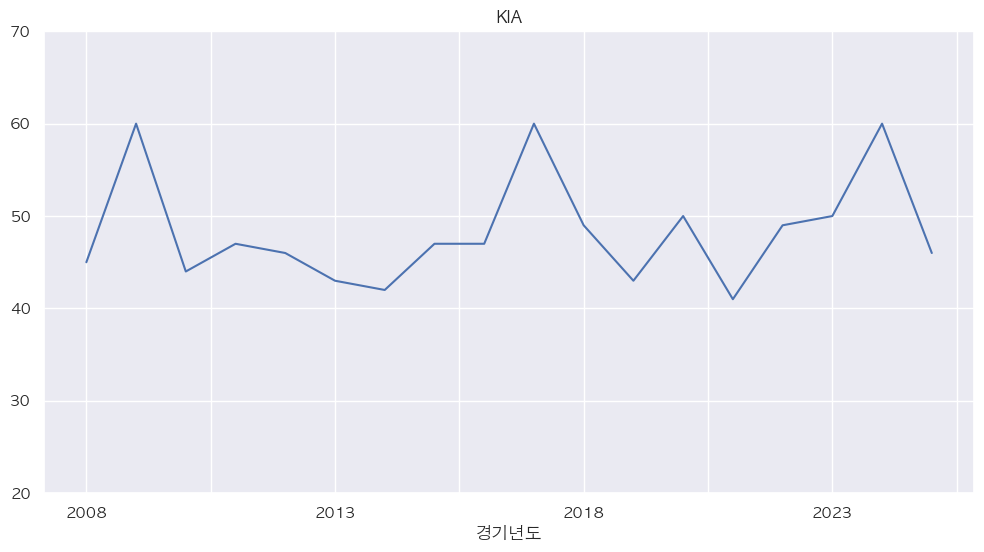

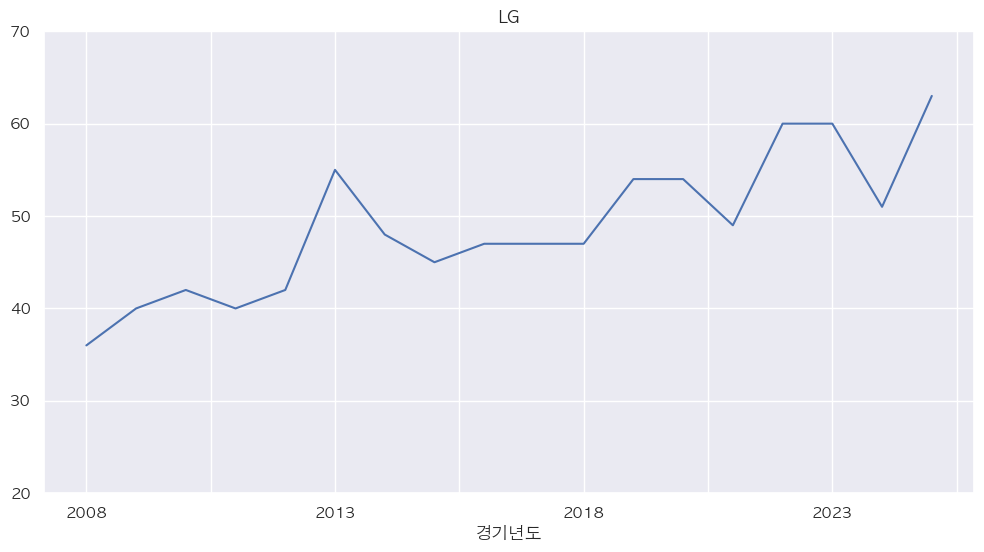

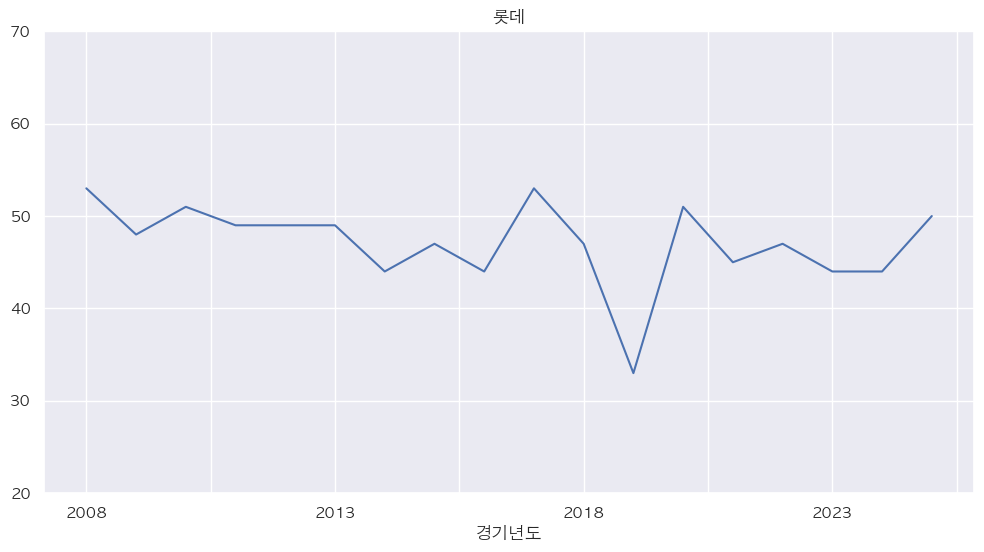

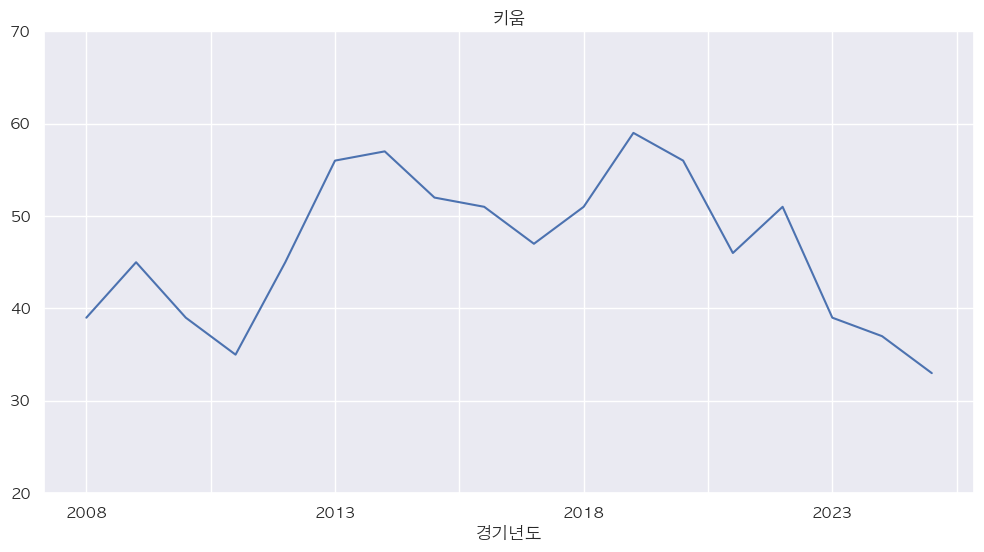

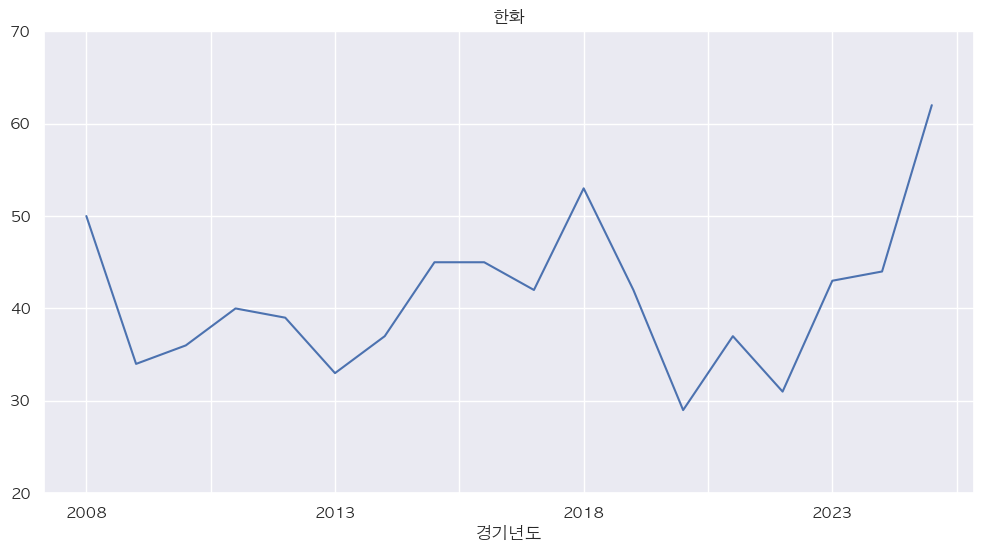

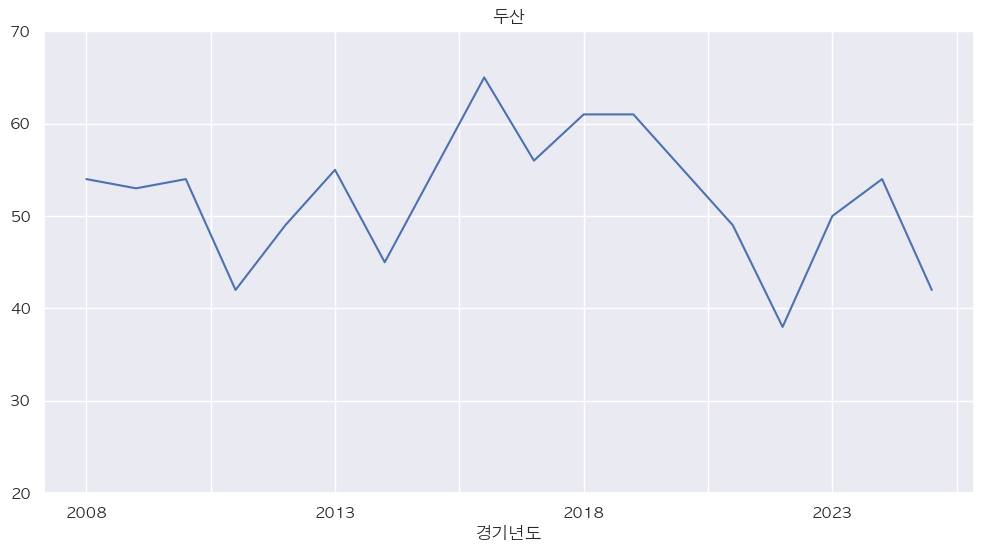

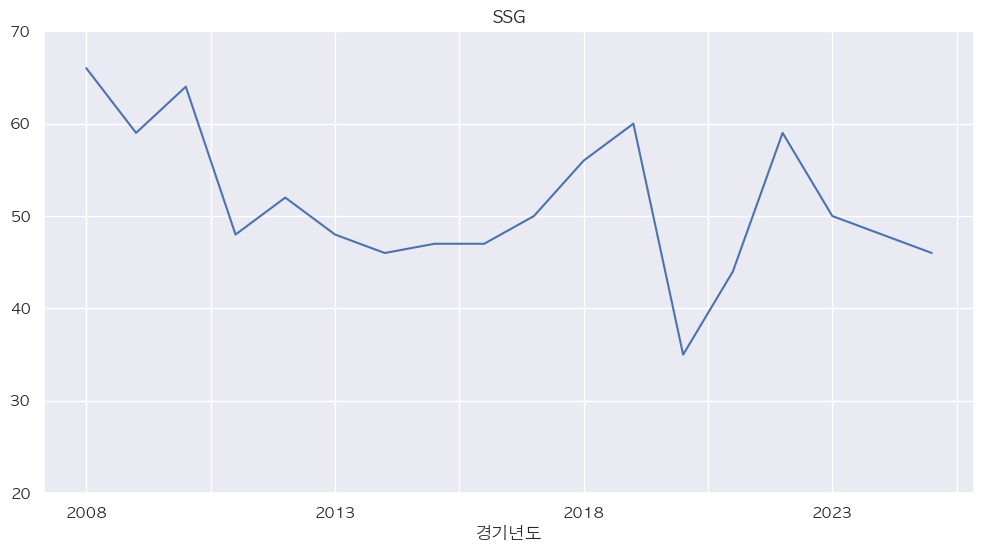

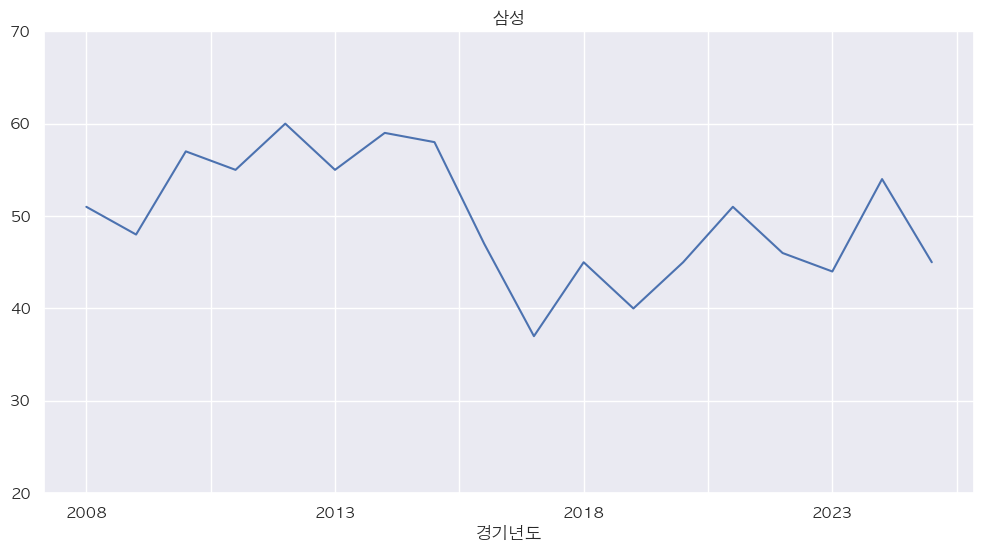

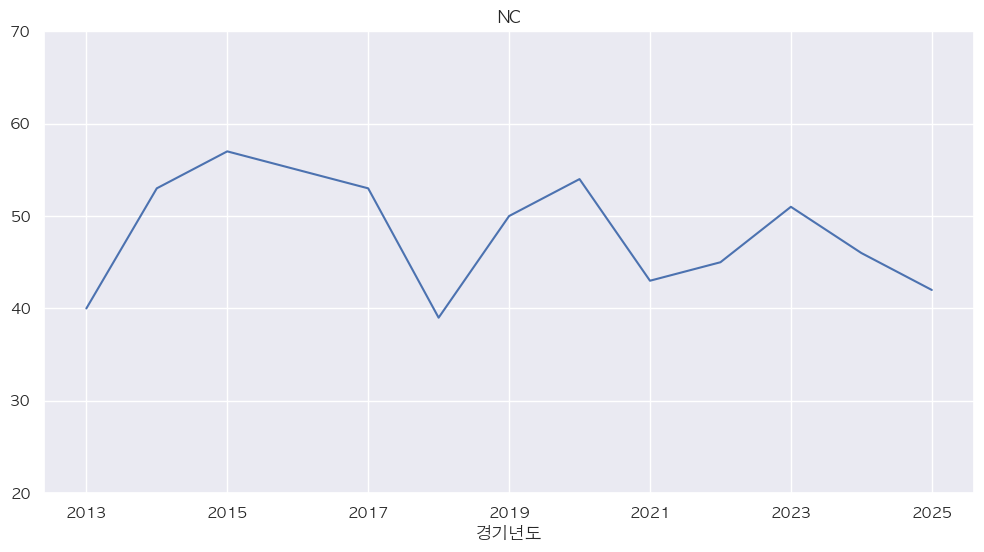

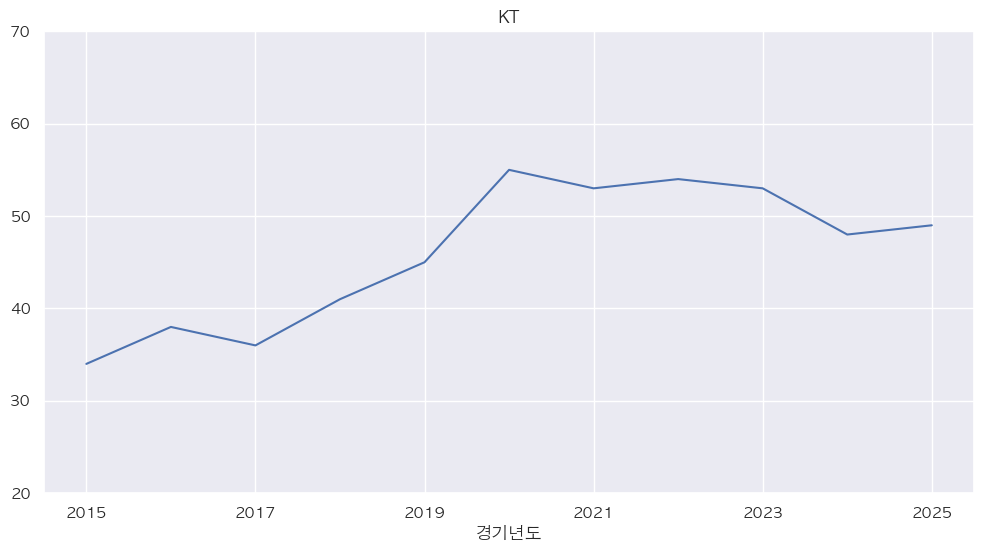

In [27]:
# 필요한 컬럼만 가져온다.
df4 = df3[['팀1이름', '경기결과', '경기년도']]
# 팀이름을 중복되지 않게 가져온다.
team_list = df4['팀1이름'].unique()

# 팀 이름의 수 만큼 반복한다.
for team_name in team_list :
    # 현재 팀의 데이터만 가져온다.
    a1 = df4.query('팀1이름 == @team_name')
    # 각 년도별 경기 횟수를 구한다.
    a2 = a1.groupby('경기년도')['경기결과'].count()
    # 각 년도별 승리 횟수를 구한다.
    a3 = a1.query('경기결과 == "승리"')
    a4 = a3.groupby('경기년도')['경기결과'].count()
    # 승률을 구한다.
    a5 = a4 / a2 * 100
    a6 = a5.astype('int')
    a7 = a6.sort_index()

    # 선그래프로 그린다.
    a7.plot()
    plt.title(team_name)
    plt.ylim(20, 70)
    plt.show()

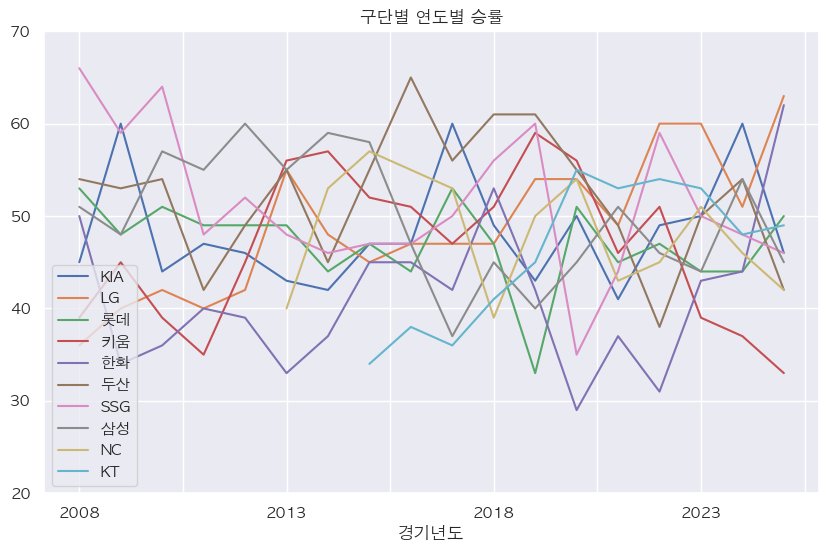

In [28]:
result = pd.DataFrame()

for team_name in team_list:
    a1 = df4.query('팀1이름 == @team_name')
    a2 = a1.groupby('경기년도')['경기결과'].count()

    a3 = a1.query('경기결과 == "승리"')
    a4 = a3.groupby('경기년도')['경기결과'].count()

    win_rate = (a4 / a2 * 100).astype(int)
    result[team_name] = win_rate

result.sort_index(inplace=True)

result.plot(figsize=(10,6))
plt.title('구단별 연도별 승률')
plt.ylim(20, 70)
plt.show()

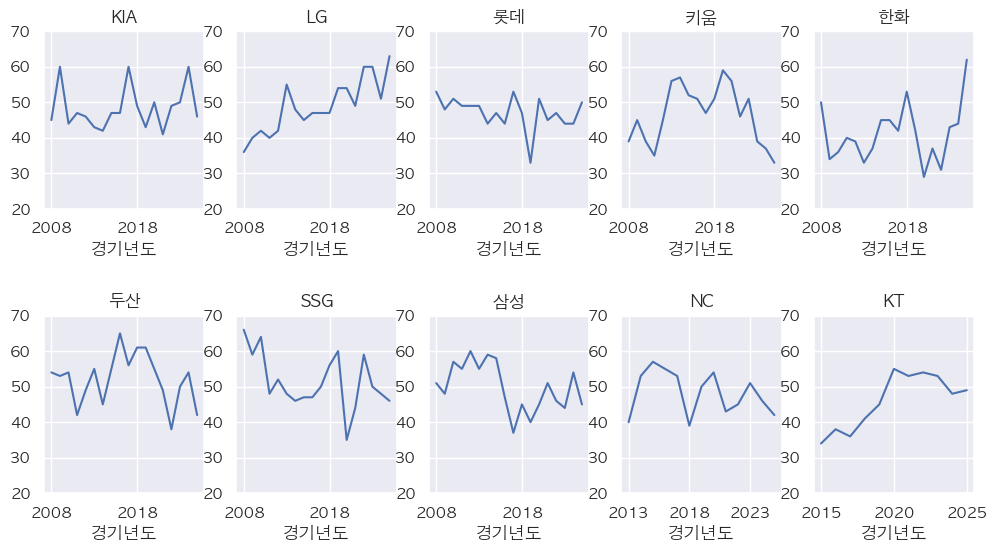

In [29]:
# 필요한 컬럼만 가져온다.
df4 = df3[['팀1이름', '경기결과', '경기년도']]
# 팀이름을 중복되지 않게 가져온다.
team_list = df4['팀1이름'].unique()

# 팀 이름의 수 만큼 반복한다.
for position, team_name in enumerate(team_list) :
    # 현재 팀의 데이터만 가져온다.
    a1 = df4.query('팀1이름 == @team_name')
    # 각 년도별 경기 횟수를 구한다.
    a2 = a1.groupby('경기년도')['경기결과'].count()
    # 각 년도별 승리 횟수를 구한다.
    a3 = a1.query('경기결과 == "승리"')
    a4 = a3.groupby('경기년도')['경기결과'].count()
    # 승률을 구한다.
    a5 = a4 / a2 * 100
    a6 = a5.astype('int')
    a7 = a6.sort_index()

    # 선그래프로 그린다.
    plt.subplot(2, 5, position + 1)
    a7.plot()
    plt.title(team_name)
    plt.ylim(20, 70)
    
# 그래프 간의 높이를 설정한다.
plt.subplots_adjust(hspace=0.6)
plt.show()

### 맛도리 팀을 찾아라~~~
- 상대 전적이 높은 팀 top 3를 뽑아본다

In [30]:
# 팀 목록을 가져온다.
team_name_list = df3['팀1이름'].unique()
team_name_list

array(['KIA', 'LG', '롯데', '키움', '한화', '두산', 'SSG', '삼성', 'NC', 'KT'],
      dtype=object)

In [31]:
# top3 들어간 횟수를 담을 Series를 만든다.
b1 = np.zeros(len(team_name_list))
top3_team = pd.Series(b1, index=team_name_list, dtype='int')
top3_team

KIA    0
LG     0
롯데     0
키움     0
한화     0
두산     0
SSG    0
삼성     0
NC     0
KT     0
dtype: int64

In [32]:
team_name = team_name_list[0]

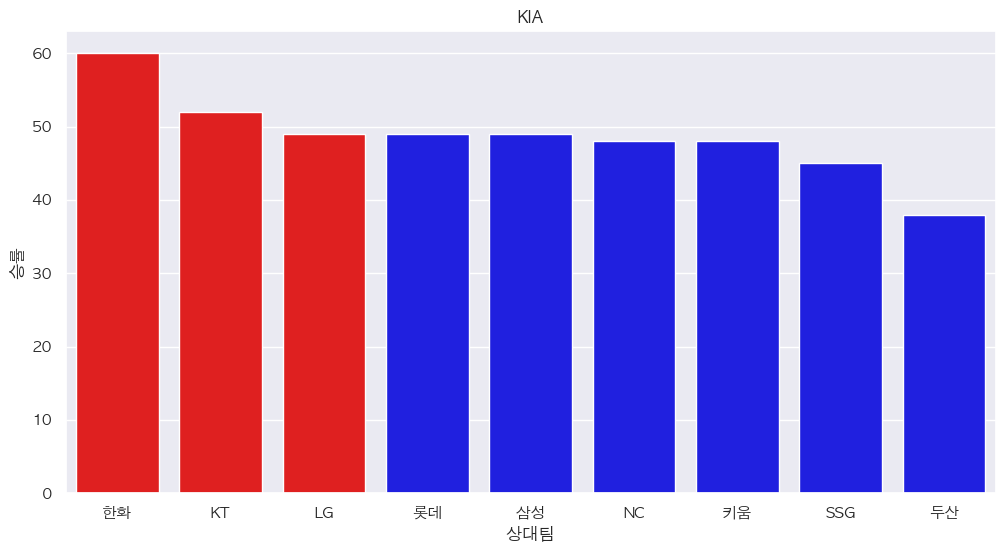

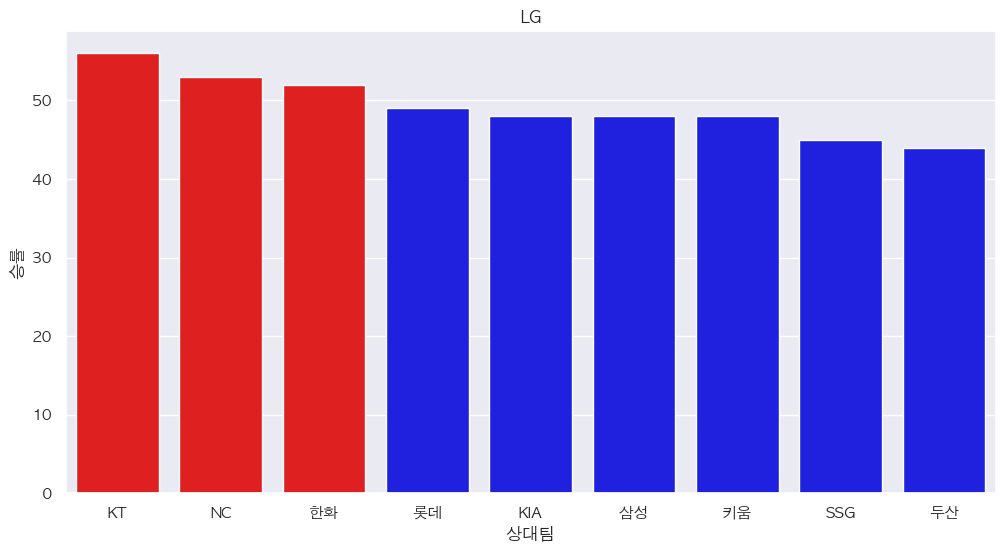

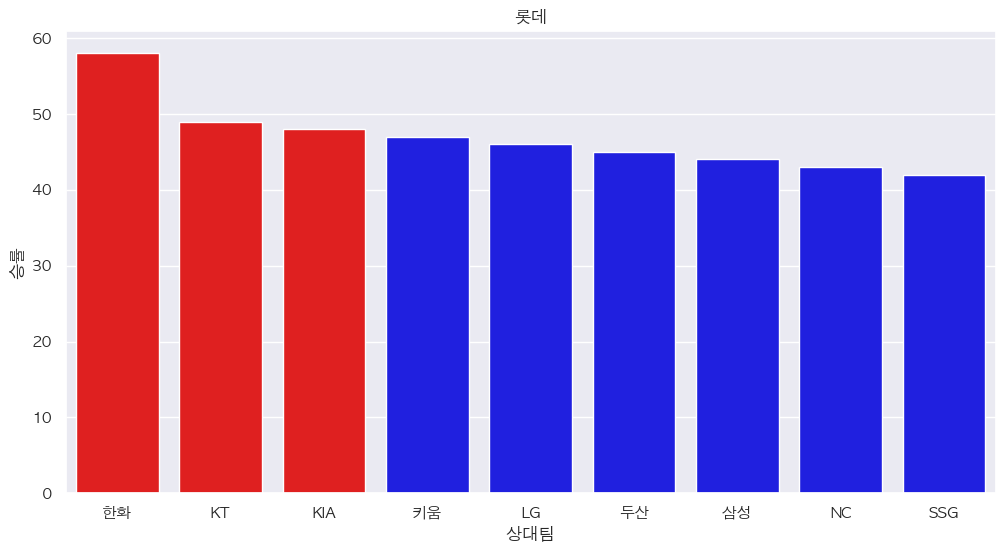

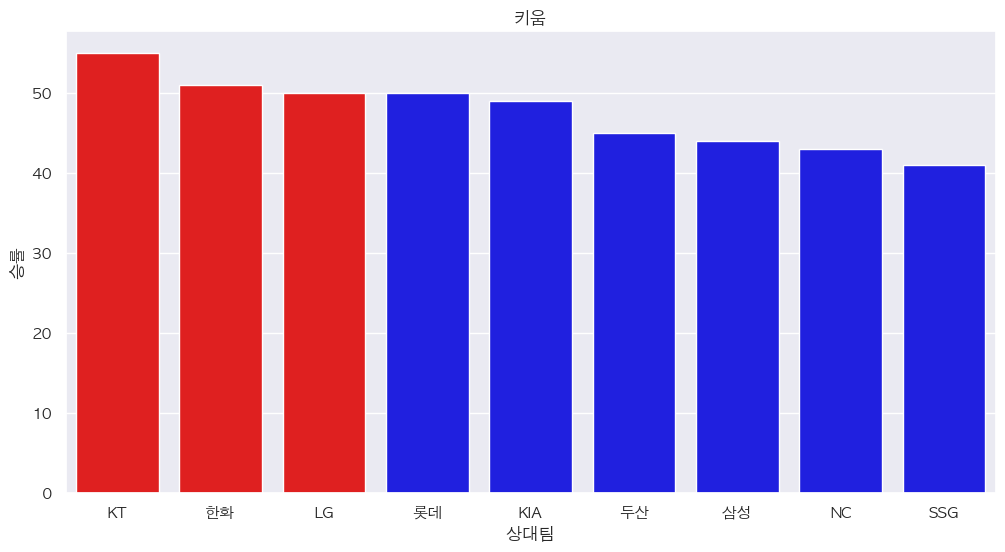

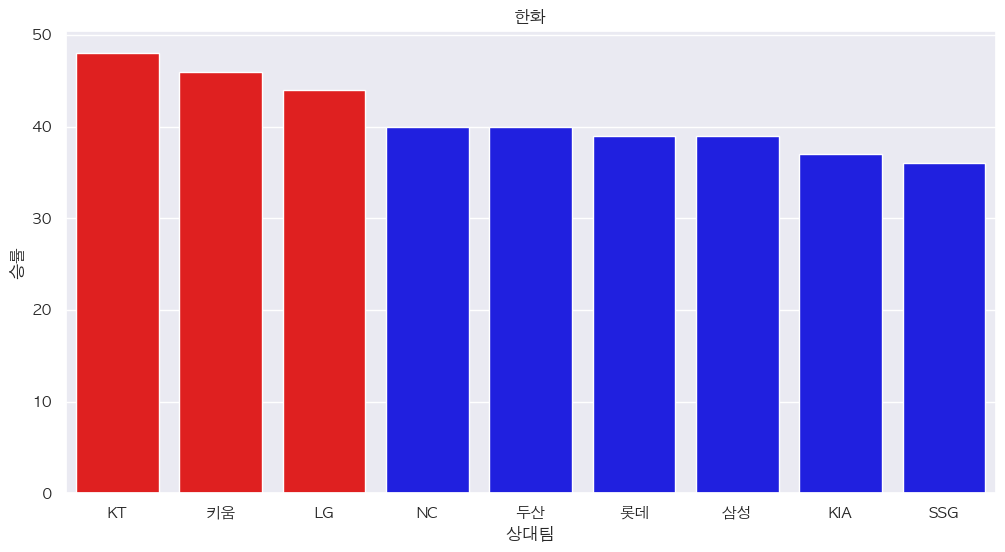

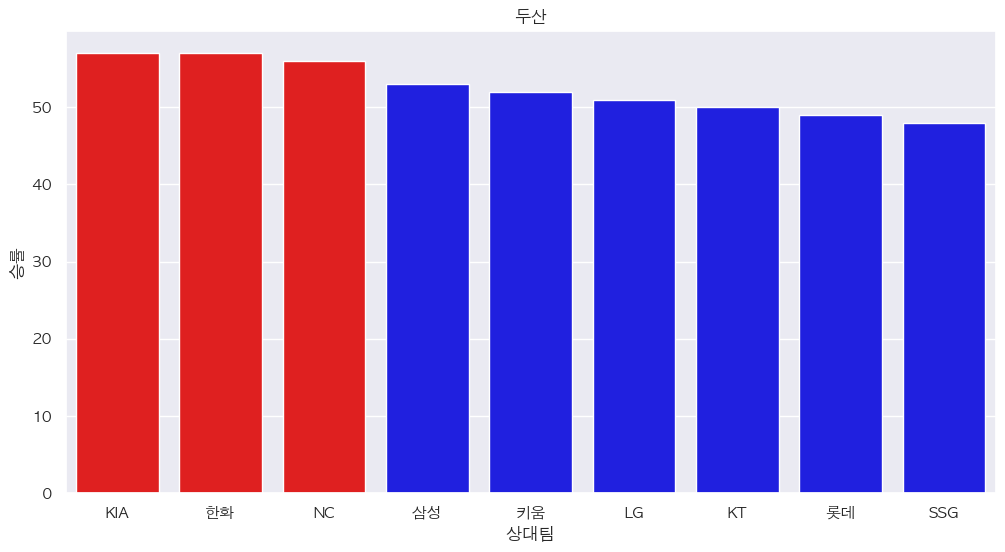

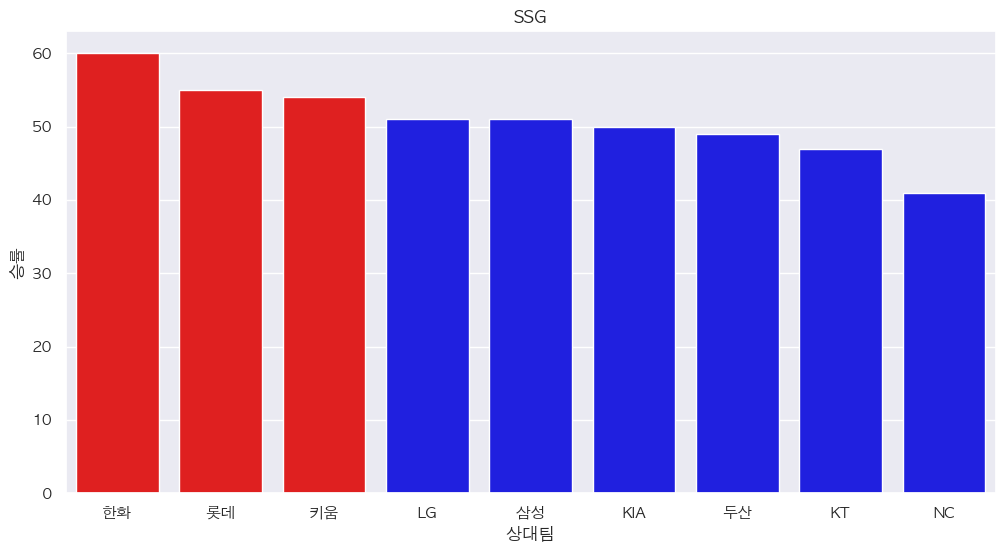

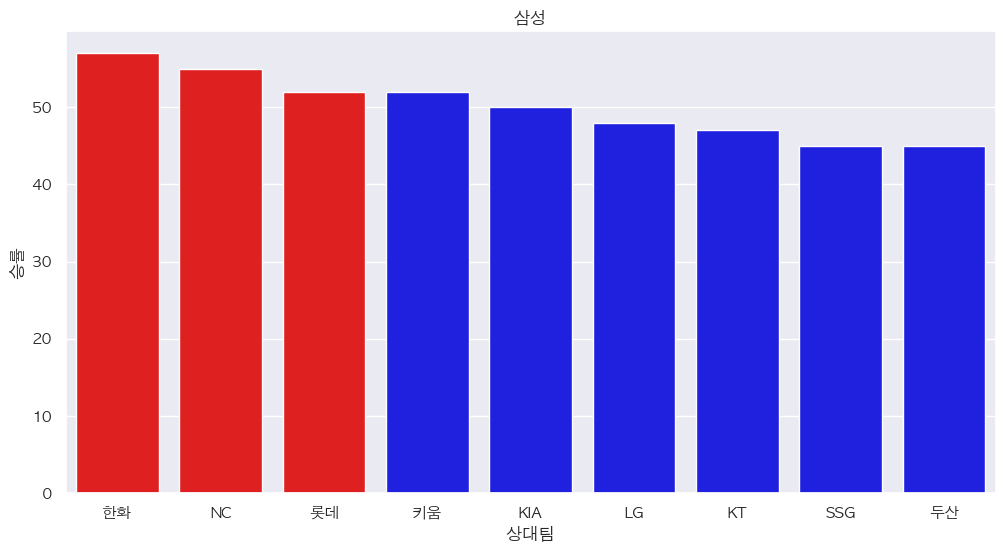

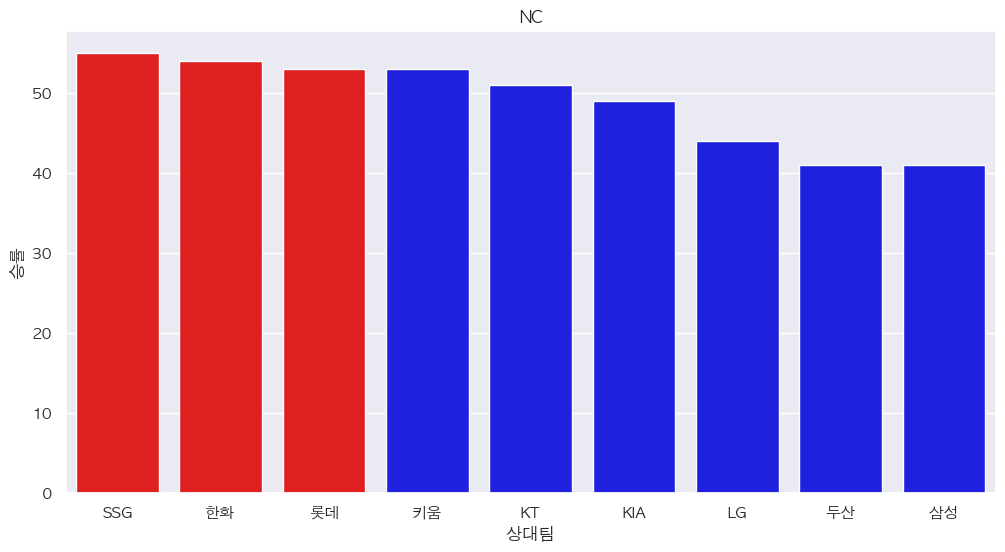

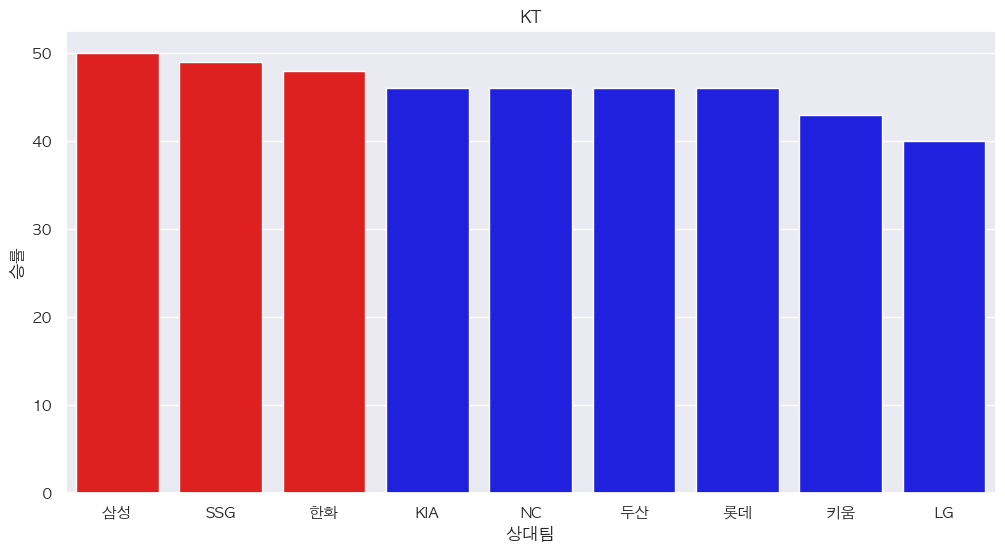

In [36]:
# 팀의 수 만큼 만복한다.
for team_name in team_name_list :
    # 현재 팀에 해당하는 데이터를 가져온다.
    a1 = df3.query('팀1이름 == @team_name')
    # 각 팀별 전체 경기수
    a2 = a1[['팀2이름', '경기결과']]
    a3 = a2.groupby('팀2이름').count()
    # 현재 팀이 각 팀에게 승리한 경기수
    a4 = a2.query('경기결과 == "승리"')
    a5 = a4.groupby('팀2이름').count()
    # 승률을 구한다.
    a6 = a5 / a3 * 100
    a7 = a6.astype('int')
    a8 = a7.sort_values('경기결과', ascending=False)
    a9 = a8.reset_index()
    a9.columns = ['상대팀', '승률']

    # top 3 Series에서 top3에 든 팀을 1씩 증가시킨다.
    a10 = a9.head(3)
    k1 = a10.loc[0, '상대팀']
    k2 = a10.loc[1, '상대팀']
    k3 = a10.loc[2, '상대팀']

    top3_team.loc[k1] = top3_team.loc[k1] + 1
    top3_team.loc[k2] = top3_team.loc[k2] + 1
    top3_team.loc[k3] = top3_team.loc[k3] + 1

    # 시각화
    sns.barplot(data=a9, x='상대팀', y='승률', palette=['red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'], hue='상대팀')
    plt.title(team_name)
    plt.show()

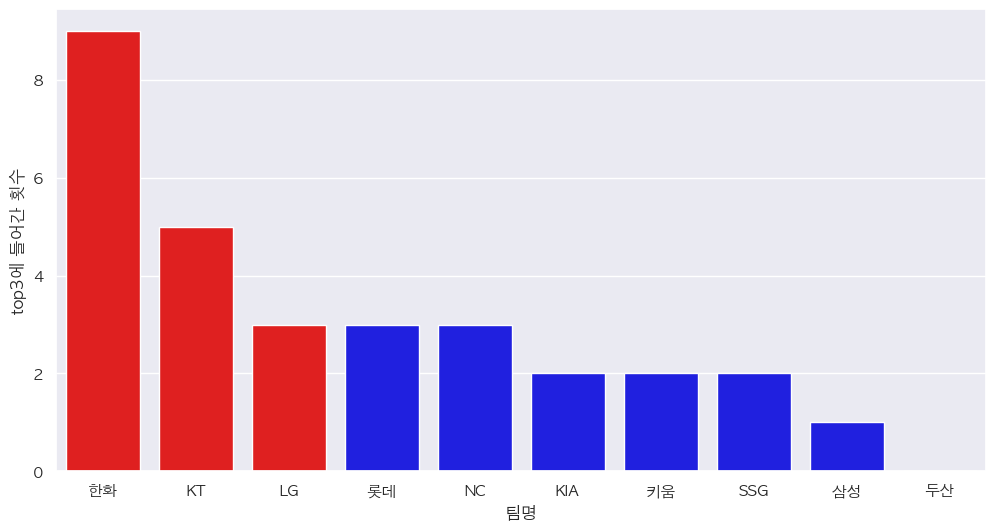

In [37]:
# 상대 전적이 높은 횟수를 기준으로 정렬한다.
a1 = top3_team.sort_values(ascending=False)
# 데이터 프레임으로 만들어준다.
a2 = pd.DataFrame(a1)
a2.reset_index(inplace=True)
a2.columns = ['팀명', 'top3에 들어간 횟수']

color_list = ['blue'] * len(team_name_list)
color_list[0] = 'red'
color_list[1] = 'red'
color_list[2] = 'red'

sns.barplot(data=a2, x='팀명', y='top3에 들어간 횟수', palette=color_list, hue='팀명')
plt.show()

# bar_list = plt.bar(a2['팀명'], a2['top3에 들어간 횟수'])
# bar_list[0].set_color('red')
# bar_list[1].set_color('red')
# bar_list[2].set_color('red')
# plt.show()